<a href="https://colab.research.google.com/github/ttmaroa/firstever/blob/main/ABC_LIMITED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# installing the required libraries

!pip install pandas openpyxl matplotlib seaborn xlsxwriter reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.0 MB/s eta 0:00:00


In [3]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import xlsxwriter

In [4]:
# Loading the dataset

path = "/content/drive/MyDrive/work/Excel Simulation.xlsx"
xls = pd.ExcelFile(path)

In [5]:
# preparing the data

y1 = xls.parse('Data - Year 1')
y2 = xls.parse('Data - Year 2')
y3 = xls.parse('Data - Year 3')

In [6]:
# cleaning the data

# Remove 'TOTAL' row and any empty rows
y1 = y1[y1['PARTICULAR'].notna() & (y1['PARTICULAR'] != 'TOTAL')]
y2 = y2[y2['PARTICULAR'].notna() & (y2['PARTICULAR'] != 'TOTAL')]
y3 = y3[y3['PARTICULAR'].notna() & (y3['PARTICULAR'] != 'TOTAL')]

# Set 'PARTICULAR' as index for easier analysis
y1.set_index('PARTICULAR', inplace=True)
y2.set_index('PARTICULAR', inplace=True)
y3.set_index('PARTICULAR', inplace=True)

In [7]:
# removing the negative signs

y1 = y1.abs()
y2 = y2.abs()
y3 = y3.abs()

In [9]:
# computing total monthly sales

y1['TOTAL'] = y1[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum(axis=1)
y2['TOTAL'] = y2[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum(axis=1)
y3['TOTAL'] = y3[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum(axis=1)

In [10]:
# calculating the annual growth rate and trends

# total sales by brands
total_sales = pd.DataFrame({
    'Year 1': y1['TOTAL'],
    'Year 2': y2['TOTAL'],
    'Year 3': y3['TOTAL']
}).fillna(0)


# overall annual growth rates
overall_sales = total_sales.sum()
overall_growth = overall_sales.pct_change() * 100
print("Overall Annual Growth Rates:")
print(overall_growth)

# growth rate of the brands
brand_growth = total_sales.pct_change(axis=1) * 100
print("\nPer-Brand Growth Rates:")
print(brand_growth)

Overall Annual Growth Rates:
Year 1          NaN
Year 2    27.445218
Year 3   -17.834788
dtype: float64

Per-Brand Growth Rates:
            Year 1        Year 2      Year 3
PARTICULAR                                  
PORSCHE        NaN -2.198627e+01   18.120893
MERCEDES       NaN  7.028686e+06  -14.482651
TOYOTA         NaN -8.466806e+01   15.756796
MITSUBISHI     NaN -9.744892e+01  135.120260
LAND ROVER     NaN  7.952753e+04   -2.955038
NISSAN         NaN -9.060306e+01  135.957348
VW             NaN -9.985942e+01  132.533046
FERRARI        NaN  6.339737e+04  -99.991385
TOTAL.....     NaN           NaN         NaN


In [11]:
# visualizing

# Plot total sales trend per brand
plt.figure(figsize=(10, 6))
for brand in total_sales.index:
    plt.plot(total_sales.columns, total_sales.loc[brand], marker='o', label=brand)
plt.title('Sales Trends by Brand (Year 1 to Year 3)')
plt.xlabel('Year')
plt.ylabel('Sales (KSH)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('sales_trends.png')
plt.close()

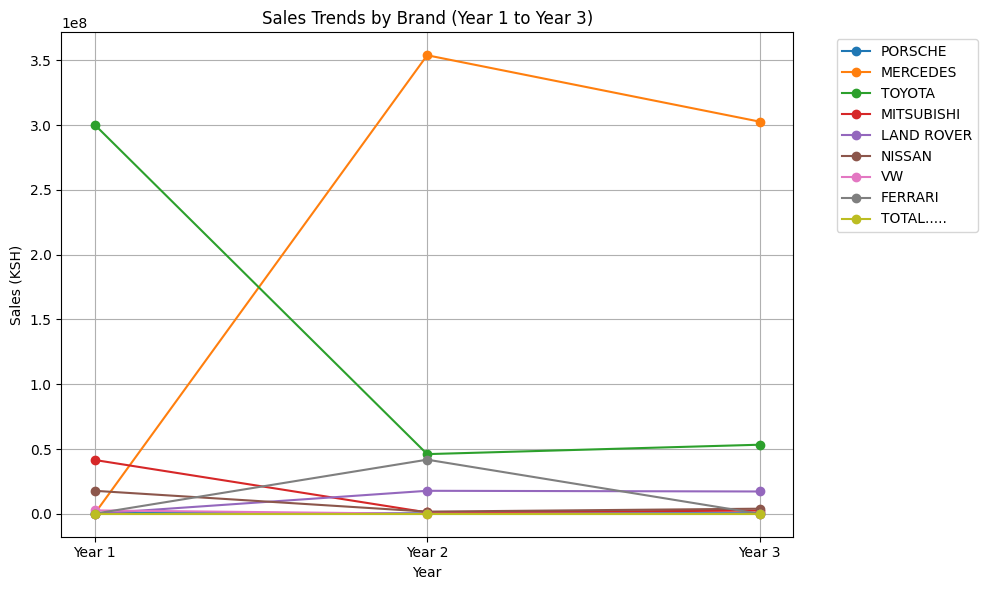

In [14]:
# we can visualize it here as well

plt.figure(figsize=(10, 6))
for brand in total_sales.index:
    plt.plot(total_sales.columns, total_sales.loc[brand], marker='o', label=brand)
plt.title('Sales Trends by Brand (Year 1 to Year 3)')
plt.xlabel('Year')
plt.ylabel('Sales (KSH)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# getting the october sales performance

october_sales = pd.DataFrame({
    'Year 1': y1['OCT'],
    'Year 2': y2['OCT'],
    'Year 3': y3['OCT']
}).fillna(0)


# year on year growth rates
october_growth = october_sales.pct_change(axis=1) * 100
print("October Annual Growth Rates:")
print(october_growth)

October Annual Growth Rates:
            Year 1      Year 2      Year 3
PARTICULAR                                
PORSCHE        NaN  177.736307  -92.433227
MERCEDES       NaN         inf  -16.092361
TOYOTA         NaN  -85.225034   31.061501
MITSUBISHI     NaN  -94.188511  -22.798005
LAND ROVER     NaN         inf   41.800933
NISSAN         NaN  -96.997919  726.574122
VW             NaN -100.000000         inf
FERRARI        NaN         inf -100.000000
TOTAL.....     NaN         NaN         NaN


In [16]:
# visualizing the sales

plt.figure(figsize=(10, 6))
sns.heatmap(october_sales, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('October Sales by Brand and Year')
plt.savefig('october_sales.png')
plt.close()

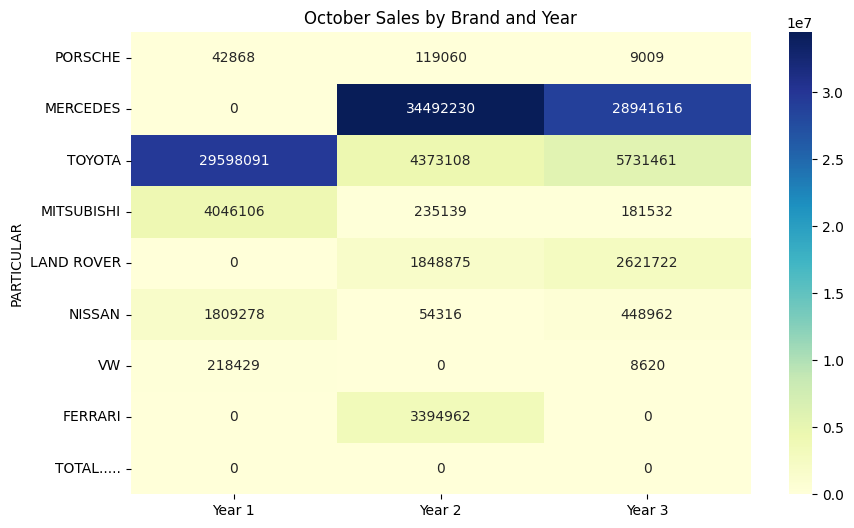

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(october_sales, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('October Sales by Brand and Year')
# plt.savefig('october_sales.png')
plt.show()

In [18]:
# getting the market share analysis

# Calculate market share
market_share = total_sales.div(total_sales.sum()) * 100
print("\nMarket Share by Brand:")
print(market_share)

# Plot market share for Year 3
plt.figure(figsize=(8, 8))
market_share['Year 3'].plot(kind='pie', autopct='%1.1f%%')
plt.title('Market Share by Brand (Year 3)')
plt.savefig('market_share.png')
plt.close()


Market Share by Brand:
               Year 1     Year 2     Year 3
PARTICULAR                                 
PORSCHE      0.148585   0.090954   0.130756
MERCEDES     0.001387  76.496514  79.617382
TOYOTA      82.757751   9.955940  14.026224
MITSUBISHI  11.450339   0.229202   0.655874
LAND ROVER   0.006140   3.836156   4.530866
NISSAN       4.891236   0.360646   1.035683
VW           0.726439   0.000801   0.002268
FERRARI      0.018124   9.029787   0.000947
TOTAL.....   0.000000   0.000000   0.000000


In [23]:
# Average monthly sales per brand for Year 3
monthly_avg = y3[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean(axis=1)
print("\nAverage Monthly Sales (Year 3):")
print(monthly_avg)

# Plot monthly sales for top 3 brands in Year 3
top_brands = y3['TOTAL'].nlargest(3).index
plt.figure(figsize=(12, 6))
for brand in top_brands:
    plt.plot(y3.columns[:-1], y3.loc[brand, y3.columns[:-1]], marker='o', label=brand)
plt.title('Monthly Sales Patterns for Top Brands (Year 3)')
plt.xlabel('Month')
plt.ylabel('Sales (KSH)')
plt.legend()
plt.grid(True)
plt.savefig('monthly_patterns.png')
plt.close()


Average Monthly Sales (Year 3):
PARTICULAR
PORSCHE       4.970350e+04
MERCEDES      2.751321e+07
TOYOTA        4.847013e+06
MITSUBISHI    2.266491e+05
LAND ROVER    1.565722e+06
NISSAN        3.578988e+05
VW            8.620000e+03
FERRARI       3.599000e+03
TOTAL.....             NaN
dtype: float64


In [25]:
# creating the workbook

# Create Excel workbook
output_excel = 'ABC_Limited_Analysis.xlsx'
with pd.ExcelWriter(output_excel, engine='xlsxwriter') as writer:
    # original data with computed totals
    y1.to_excel(writer, sheet_name='Data - Year 1')
    y2.to_excel(writer, sheet_name='Data - Year 2')
    y3.to_excel(writer, sheet_name='Data - Year 3')

    # analysis tabs
    total_sales.to_excel(writer, sheet_name='Total Sales')
    brand_growth.to_excel(writer, sheet_name='Brand Growth Rates')
    october_sales.to_excel(writer, sheet_name='October Sales')
    market_share.to_excel(writer, sheet_name='Market Share')


    # pivot table for Year 3 monthly sales
    pivot_table = y3[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].T.reset_index().melt(id_vars='index', var_name='Brand', value_name='Sales')
    pivot_table.to_excel(writer, sheet_name='Year 3 Pivot')


    # chart for total sales
    workbook = writer.book
    worksheet = writer.sheets['Total Sales']
    chart = workbook.add_chart({'type': 'line'})
    for i, brand in enumerate(total_sales.index):
        chart.add_series({
            'name': brand,
            'categories': ['Total Sales', 0, 1, 0, 3],
            'values': ['Total Sales', i+1, 1, i+1, 3]
        })
    worksheet.insert_chart('F2', chart)

In [26]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter


pdf_file = 'ABC_Limited_Report.pdf'
doc = SimpleDocTemplate(pdf_file, pagesize=letter)
styles = getSampleStyleSheet()
story = []


story.append(Paragraph("ABC Limited Sales Analysis Report", styles['Title']))
story.append(Spacer(1, 12))


story.append(Paragraph("Executive Summary", styles['Heading1']))
summary = (
    "This report analyzes sales data for ABC Limited over three years, focusing on annual growth rates, "
    "October performance, and market share trends. Mercedes and Ferrari show strong growth, while Porsche and VW "
    "are inconsistent. Recommendations include investing in Mercedes and Ferrari, reviewing Mitsubishi and Nissan, "
    "and monitoring Land Rover."
)
story.append(Paragraph(summary, styles['BodyText']))
story.append(Spacer(1, 12))


story.append(Paragraph("1. Annual Growth Rates and Trends", styles['Heading1']))
growth_data = [[brand, f"{rate:.2f}%"] for brand, rate in brand_growth['Year 3'].items() if pd.notna(rate)]
table = Table([['Brand', 'Year 3 Growth']] + growth_data)
table.setStyle([('GRID', (0, 0), (-1, -1), 1, colors.black)])
story.append(table)
story.append(Image('sales_trends.png', width=400, height=200))
story.append(Spacer(1, 12))


story.append(Paragraph("2. October Sales Performance", styles['Heading1']))
october_data = [[brand, f"{val:.0f}"] for brand, val in october_sales['Year 3'].items() if pd.notna(val)]
table = Table([['Brand', 'October Year 3']] + october_data)
table.setStyle([('GRID', (0, 0), (-1, -1), 1, colors.black)])
story.append(table)
story.append(Image('october_sales.png', width=400, height=200))
story.append(Spacer(1, 12))

# Additional Insights
story.append(Paragraph("3. Additional Insights", styles['Heading1']))
story.append(Paragraph("Mercedes dominates market share, followed by Toyota and Ferrari. "
                       "Toyota shows seasonal peaks in May and August.", styles['BodyText']))
story.append(Image('market_share.png', width=200, height=200))
story.append(Image('monthly_patterns.png', width=400, height=200))
story.append(Spacer(1, 12))

# Recommendations
story.append(Paragraph("Recommendations", styles['Heading1']))
recommendations = (
    "- **Invest in Mercedes and Ferrari**: Consistent growth and strong market share.\n"
    "- **Review Mitsubishi and Nissan**: Low and inconsistent sales suggest cost-cutting.\n"
    "- **Monitor Land Rover**: Steady growth warrants further analysis."
)
story.append(Paragraph(recommendations, styles['BodyText']))

# Build PDF
doc.build(story)

In [28]:
from google.colab import files

files.download('ABC_Limited_Analysis.xlsx')
files.download('ABC_Limited_Report.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>